# Introduction: Research on car sales ads

At Crankshaft List Hundreds of free advertisements for vehicles are publishedon our site every day.

As an analyst at Crankshaft List, we need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Step 1: Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('datasets/vehicles_us.csv') 

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


## Let's start by looking at the numeric columns.

In [2]:
# Let's start by looking at the numeric columns.
print(len(df), 'total records')
df.describe(include='all')

51525 total records


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


<div class="alert alert-block alert-warning">
   <h3>Reviewer's commentary <a class="tocSkip"> </h3>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
Before you start data preprocessing, it is important to check the percentage of missing values, try to use this code:
    
`data.isna().sum()*100/len(data)`
       
`pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')`
       
`data.isna().mean() * 100`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

<div class="alert alert-block alert-warning">
   <h3>Reviewer's commentary <a class="tocSkip"> </h3>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Also there is one rather useful library for working with the data - `sidetable`, it offers a great number of effective methods for working with the data, including missing values. More info here:
       
https://pbpython.com/sidetable.html
       
https://github.com/chris1610/sidetable
       
Tip! If you decide to use sidetable library, don't forget to install it in the jupyter notebook, using `!pip install -U sidetable`

<div class="alert alert-block alert-success">
    <h3>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h3>
    <br/>
<b>Well done!👍:</b> 
        
Ok, looks great!

There are 51525 records in this dataset. There are lots of records that have missing values. Further investigation is needed.  

Also, all numeric columns  need to be converted into integers.  They appear to have been initially entered as integers, but somewhere along the data pipeline, they started to float.

The **'price'** column has some unusual prices, both on the low end and the high end.  Lots of \$1 cars, and lots of unusually expensive cars. Further investigation is needed.  

The **'model_year'** column has some null values and some unusual values.  We have other problems with **'model_year'**. I don't think Ford was building F-150s back in 1908. All these early model year cars need closer inspection. Also, the missing values here will need to be dealt with later on in this analysis.

The column **'cylinders'** has missing values, but the values that are there look good.  Further investigation is needed.

There are some null values in the **'odometer'** that require further investigation. 

The **'is_4wd'** column has some structural issues.  The column needs to be converted to boolean, True False, values, and null values need to be converted to False.  I imagine data was only entered into that field at the time of input in cases where the the vehicle actually **is** 4WD.

The **'days_listed'** column looks good.

We have some problems with **'model_year'**.  I don't think Ford was building F-150s back in 1908.  These early model year cars need closer inspection.  Also, the missing values here will need to be dealt with later on in this analysis.

## Let's look at the *object* columns in more detail using *value_counts()*

In [5]:
print("The 'model' column has {} all records. Looks good!".format(len(df['model'])))

The 'model' column has 51525 all records. Looks good!


In [6]:
print(df['model'].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

The **'model'** column has no null values.  Some of the values need to be be consolidated.

Consolidations such as: f150 & f-150 ==> f-150.  Similarly with f250 and f350, etc. 

In [7]:
df['model'].value_counts().head(60) # I like being able to scroll

ford f-150                     2796
chevrolet silverado 1500       2171
ram 1500                       1750
chevrolet silverado            1271
jeep wrangler                  1119
ram 2500                       1091
toyota camry                    990
honda accord                    964
chevrolet silverado 2500hd      915
gmc sierra 1500                 906
ford explorer                   847
ford escape                     841
toyota tacoma                   827
honda civic                     815
nissan altima                   813
jeep grand cherokee             806
ford focus                      754
chevrolet tahoe                 713
honda cr-v                      685
ford mustang                    681
chevrolet impala                674
toyota corolla                  650
chevrolet malibu                617
toyota tundra                   603
dodge grand caravan             598
chevrolet equinox               591
chevrolet suburban              562
ford fusion                 

The **'condition'** column has no null values.  WE HAVE BEEN GIVEN EXPLICIT INSTRUCTIONS WHAT TO DO WITH **'condition'** - change them to corresponding numeric values.  See **Data Preprocessing** below.

NOTE: My instinct is to put the part in **Data Preprocessing** here.

In [8]:
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,50975.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115186.066179,1.0,39.55476
std,10040.803015,6.282065,1.660360,62387.715502,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,73000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113920.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,153000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion: odometer and model_year
The 'odometer' values have been mostly updated.  The lack of 'model_year' data kept the 'odometer' column from being free of null values.  

In [9]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

At first glance **'condition'** looks perfect.  We will make the required modifications later.

In [10]:
df['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

At first glance **'fuel'** looks good.

In [11]:
df['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

At first glance **'transmission'** looks good.

In [12]:
df['type'].value_counts() 

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

I want to consolidate **'truck'** and **'pickup'** since they're the same thing

In [13]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

## Step 1: Conclusion

**price** - no nulls. Investigate abnormal prices
 
**model_year** - Has nulls. Investigate strange year/model combinations
 
**model** - no nulls. Further inspection required to be sure I have consolidated the duplicates
 
**condition** - No nulls. Looks good!
 
**cylinders** - Has nulls. 
 
**fuel** - No nulls.  Looks good!
 
**odometer** - has nulls.  Investigate strange values further. 
 
**transmission** - No nulls.  Looks good!
 
**type** - No nulls.  I want to consolidate **'truck'** and **'pickup'** since they're the same thing
 
**paint_color** - Has nulls. Suggest replacing null values with the value 'unknown'
 
**is_4wd** - Has nulls. Convert column to boolean and replace null values with **False**
 
**date_posted** - No nulls. Needs to be converted to datetime.
 
**days_listed** - No nulls. Looks good!

## Step 2: Data preprocessing
Working with nulls, changing data types and consolidating values

### 'model_year'

In [14]:
before = len(df[df['model_year'].isna()])
md = int(df['model_year'].median())
df['model_year'] = df['model_year'].fillna(value=md)
df['model_year'] = df['model_year'].astype(int)      # Years are integers
after = len(df[df['model_year'].isna()])
print('We started with {} nulls, and now we have {} nulls.'.format(before,after))

We started with 3619 nulls, and now we have 0 nulls.


### 'model'

In [15]:
duplicate_names = df.query('type == "truck"').pivot_table(
    index='model', values='type', aggfunc='count'
)
duplicate_names # Notice the duplices in Ford's 'F' series pickup trucks

,type
model,
bmw x5,3
buick enclave,2
cadillac escalade,3
chevrolet colorado,189
chevrolet corvette,1
chevrolet malibu,1
chevrolet silverado,746
chevrolet silverado 1500,1484
chevrolet silverado 1500 crew,2


In [16]:
# Delete this cell
#df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))
#df.info()

### 'cylinders'

In [17]:
before = len(df[df['cylinders'].isna()])
df['cylinders'] = df['cylinders'].fillna(value=0)
df['cylinders'] = df['cylinders'].astype(int)
after = len(df[df['cylinders'].isna()])
print('We started with {} nulls, and now we have {} nulls.'.format(before,after))

We started with 5260 nulls, and now we have 0 nulls.


In [18]:
df['cylinders'].value_counts()

8     15844
6     15700
4     13864
0      5260
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

### Conclusion: cylinders
I want to conditionally assign 'cylinders' values using 'model' information to fill the gaps.  

### 'odometer'

In [19]:
before = len(df[df['odometer'].isna()])
md_odometer = df['odometer'].median()
df['odometer'] = df['odometer'].fillna(value=md_odometer)

df['odometer'] = df['odometer'].astype(int)
after = len(df[df['odometer'].isna()])
print('We started with {} nulls, and now we have {} nulls.'.format(before,after))

We started with 550 nulls, and now we have 0 nulls.


### 'type'

In [20]:
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

#### Let's consolidate 'truck' and 'pickup'

In [21]:
df['type'] = df['type'].where(df['type']!='pickup','truck')
df['type'].value_counts() # That's better

truck          19341
SUV            12405
sedan          12154
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

#### 'paint_color'

In [22]:
before = len(df[df['paint_color'].isna()])
df['paint_color'] = df['paint_color'].fillna(value='unknown')
after = len(df[df['paint_color'].isna()])
print('We started with {} nulls, and now we have {} nulls.'.format(before,after))

We started with 9267 nulls, and now we have 0 nulls.


In [23]:
before = len(df[df['is_4wd'].isna()])
df['is_4wd'] = df['is_4wd'].fillna(value=0)
df['is_4wd'] = df['is_4wd'].astype(bool)
after = len(df[df['is_4wd'].isna()])
print('We started with {} nulls, and now we have {} nulls.'.format(before,after))

We started with 25953 nulls, and now we have 0 nulls.


### Now let's see how we did.  

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


In [25]:
grouped_by_condition = df.groupby('condition').agg({'odometer': 'median', 'price': 'median'})
grouped_by_model = df.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
print(grouped_by_condition)
print()
print(grouped_by_model)

           odometer  price
condition                 
excellent    106000  10495
fair         174875   2500
good         128000   7900
like new      76000  13995
new           12632  21999
salvage      143000   2500

                   model_year  cylinders
model                                   
acura tl               2007.0          6
bmw x5                 2010.0          6
buick enclave          2012.0          6
cadillac escalade      2009.0          8
chevrolet camaro       2012.0          6
...                       ...        ...
toyota sienna          2008.0          6
toyota tacoma          2011.0          6
toyota tundra          2010.0          8
volkswagen jetta       2011.0          4
volkswagen passat      2013.0          4

[100 rows x 2 columns]


### Conclusion: Great!!! 
No null values, our datatypes have all been updated, and we consolidated 'pickup' and 'truck' in **'type'**

<div class="alert alert-block alert-success">
    <h3>Reviewer's commentary <a class="tocSkip"> </h3>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Jay, you are doing great! As a whole I can agree with your startegy of missing values preprocessing.
        
Some advice: columns you have tried to preprocess have numeric data, so we can study their correlation with the categorical variables from the dataset.

It would be reasonable to assume that the mileage and price correlate with the condition of the vehicle, and the number of cylinders and year with its model. And we can replace missing values with the medians, grouping the data by these parameters.
       
As I can see, you tried to apply the grouping method here, ok, it works, but I have some doubts about categorization of the `model_year` because any categorization can lead to simplification of the data. As a whole, here you can use the initial `model_year` column and there is no need to categorize it additionally.
       
See the examples:
       
`grouped_by_condition = data.groupby('condition').agg({'odometer': 'median', 'price': 'median'})`
       
`grouped_by_model = data.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})`
       
And then you can use values in these resulted dfs to fill in missing values, using loc + for loop for example;
    
One more way is to build the correlation matrix, check what factors are correlated and fill in the missing values based on correlation and grouping methods.
    
Filling in missing values with simply a median or mean by a column is a rather risky strategy and is only acceptable for cases where no more than 10% of the data is missing in our dataframe. The risk is that such an approach can lead to distortion of the initial data and, as a result, we will get a biased estimate based on the analysis results.
    
Remember, that it is important not only to fill in the missing values using some method, but also to give arguments why this particular method in this particular case is adequate and correct. And it is better to connect the strategy you choose for filling in missing values with the hypotheses about why there are missing values in the data, why they occur.

<div class="alert alert-block alert-success">
    <h3>Reviewer's commentary <a class="tocSkip"> </h3>
    <br/>
<b>Well done!👍:</b> 
        
Data types are also changed correctly.

## Make calculations and add them to the table

In [26]:
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))
df.describe()#- mileage, number of cylinders, and condition

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.838234,5.499932,115172.534867,39.55476
std,10040.803015,6.065836,2.431985,62053.971986,28.20427
min,1.000000,1908.000000,0.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,73597.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113920.000000,33.00000
75%,16839.000000,2014.000000,8.000000,152624.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


In [27]:
df['day_posted'] = pd.to_datetime(df['date_posted'])

df['day_of_week'] = df['day_posted'].dt.weekday
df['vehicle_age'] = (df['day_posted'].dt.year) - (df['model_year'])
df['vehicle_age'] = df['vehicle_age'].where(df['vehicle_age']!=0,1) # to avoid dividing by zero
df['avg_miles_yearly'] = (df['odometer'] / df['vehicle_age'])
df['avg_miles_yearly'] = df['avg_miles_yearly'].astype('int')

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
       
Pandas library allows to add the month, year and weekday using methods like  `day_name()` и `month_name()`.
    
More information here:
    
https://www.geeksforgeeks.org/python-pandas-series-dt-day_name/
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month_name.html
    
https://www.geeksforgeeks.org/python-pandas-series-dt-month_name/
       
The methods you used are correct, these ones as additional information:)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
       
It is absolutely correct action to hande the zero values in age, because division by zero results in the -inf values in the column. You can handle this problem also by using this option:
       
`data['age'] = data['year_posted'] - data['model_year'] + 1`

In [28]:
df['condition'] = df['condition'].where(df['condition']!='new','5')
df['condition'] = df['condition'].where(df['condition']!='like new','4')
df['condition'] = df['condition'].where(df['condition']!='excellent','3')
df['condition'] = df['condition'].where(df['condition']!='good','2')
df['condition'] = df['condition'].where(df['condition']!='fair','1')
df['condition'] = df['condition'].where(df['condition']!='salvage','0')

print(df['condition'].value_counts())

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

It is more effective to use the `replace()` method to categorize the data:
        
`df['condition'] = df['condition'].replace(['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], [0, 1, 2, 3, 4, 5])`

## Carry out exploratory data analysis

In [29]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,day_of_week,vehicle_age,avg_miles_yearly
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,5.499932,115172.534867,39.55476,3.005434,8.510529,17740.435633
std,10040.803015,6.065836,2.431985,62053.971986,28.20427,1.997759,6.025251,12413.047952
min,1.000000,1908.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,73597.000000,19.00000,1.000000,4.000000,10926.000000
50%,9000.000000,2011.000000,6.000000,113920.000000,33.00000,3.000000,7.000000,15294.000000
75%,16839.000000,2014.000000,8.000000,152624.000000,53.00000,5.000000,12.000000,21015.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,110.000000,373200.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

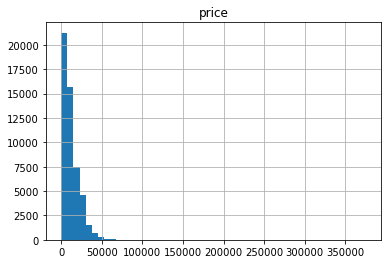

In [30]:
df.hist('price',bins=50)

### Wow! That's a lot of cars for free!  Also, some really expensive outliers.

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

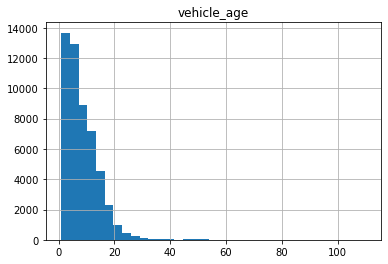

In [31]:
df.hist('vehicle_age',bins=35)

### That's a lot of new cars, and a few really old ones.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

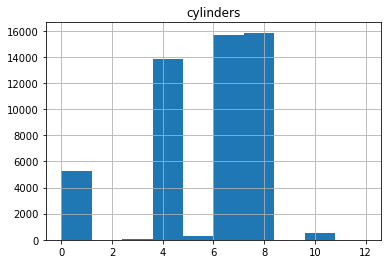

In [32]:
df.hist('cylinders')

### This actually looks pretty normal.  A few beefy engines with 10 and 12 cylinders.  The zero values are unknow cylinder values.  Let's try to assign these 5000 or so zero cylinders given other criteria below.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

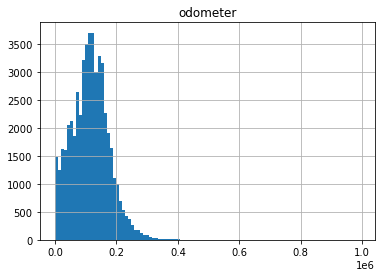

In [33]:
df.hist('odometer', bins=100)

### This is a reasonable distribution for the most part.  Outliers need to be investigated below.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

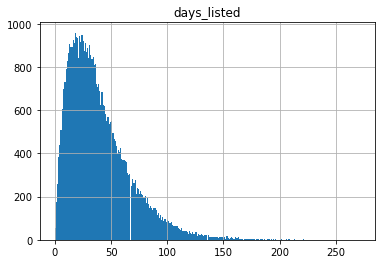

In [34]:
df.hist('days_listed', bins=275)

### This is the most reliable data column in this set.  The system most likely automatically logged when the item was listed, therefore these flaues are clean.

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

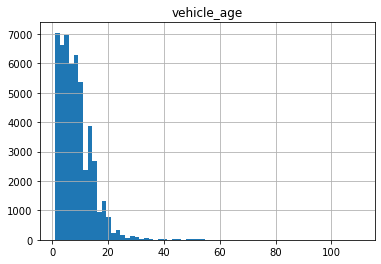

In [35]:
df.hist('vehicle_age', bins=65)

array([[<AxesSubplot:title={'center':'avg_miles_yearly'}>]], dtype=object)

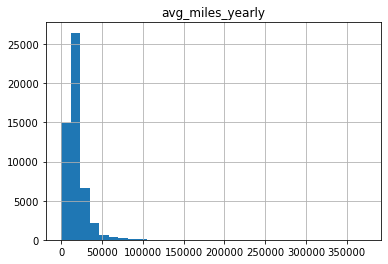

In [36]:
df.hist('avg_miles_yearly',bins=32)

### Wow! There more cars with  25,000 average miles yearly than all others values combined!  Let's further investigate below.

In [37]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,day_of_week,vehicle_age,avg_miles_yearly
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,5.499932,115172.534867,39.55476,3.005434,8.510529,17740.435633
std,10040.803015,6.065836,2.431985,62053.971986,28.20427,1.997759,6.025251,12413.047952
min,1.000000,1908.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,73597.000000,19.00000,1.000000,4.000000,10926.000000
50%,9000.000000,2011.000000,6.000000,113920.000000,33.00000,3.000000,7.000000,15294.000000
75%,16839.000000,2014.000000,8.000000,152624.000000,53.00000,5.000000,12.000000,21015.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,110.000000,373200.000000


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, as a whole the logic of the deciison at this step is correct, all the plots are in place, good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
Some recommendations for formatting of the plot: it is better to add custom title and x and y axis labels to your plot and the common title too.
       
Some useful links:
       
https://www.python-graph-gallery.com/4-add-title-and-axis-label
       
https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
       
Also, it is better to delete technical strings like `<matplotlib.axes._subplots.AxesSubplot at 0x7f529e0802d0>` from your graphs: use `plt.show()` or `;`.
       
So, please, try to improve all the plots in your project. Because it is the EDA project, here it is really important to make your plots informative.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
It is still better to remove the technical strings at least👀
       
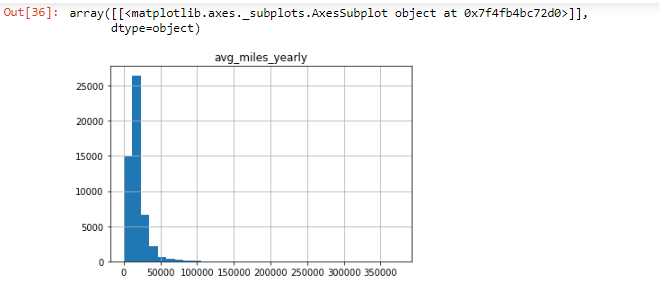

## Outliers
### Let's create a way to mark each column's outliers individually, and afterwards, let's split the data from 'df' into 'df_no_outliers' and 'df_outliers.' 

### Price

<AxesSubplot:>

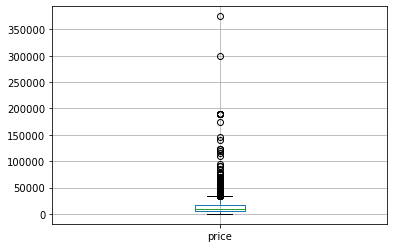

In [38]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('price')

In [39]:
outlier = df[df['price']>u_limit]
outlier_count = outlier['price'].count()
print("There are {} 'price' outliers".format(outlier_count))

There are 1646 'price' outliers


In [40]:
# Mark outliers
def f(row):
    if row['price'] <= u_limit:
        val = False
    else:
        val = True
    return val
df['outlier_price'] = df.apply(f, axis=1)

### Cylinders

<AxesSubplot:>

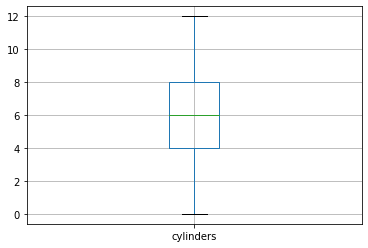

In [41]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('cylinders')

In [42]:
outlier_count = df['cylinders'].where((df['cylinders'] == 0) | (df['cylinders'] == 12)).count()
print("There are {} 'cylinders' outliers".format(outlier_count))

There are 5262 'cylinders' outliers


In [43]:
def f(row):
    if (row['cylinders'] >= l_limit) & (row['cylinders'] <= u_limit):
        val = False
    else:
        val = True
    return val
df['outlier_cylinders'] = df.apply(f, axis=1)

### The zero cylinder engines are of unknown value.  12 Cylinder cars exist, but there are only 2 occurances of them.  

### Odometer

<AxesSubplot:>

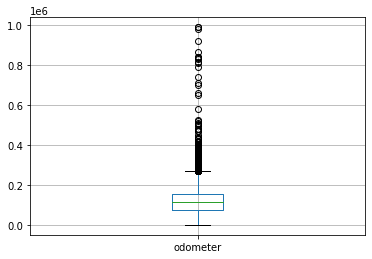

In [44]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('odometer')

In [45]:
outlier = df[df['odometer']>u_limit]
outlier_count = outlier['odometer'].count()
print("There are {} 'odometer' outliers".format(outlier_count))

There are 646 'odometer' outliers


In [46]:
def f(row):
    if (row['odometer'] >= l_limit) and( row['odometer'] <= u_limit):
        val = False
    else:
        val = True
    return val
df['outlier_odometer'] = df.apply(f, axis=1)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, Jay, it is correct to use the IQR method for deleting the outliers, it is rather effective one for this task! More details about working with the outliers you can find by links:
    
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    
http://colingorrie.github.io/outlier-detection.html#iqr-method
    
https://statisticsbyjim.com/basics/outliers/

### Days Listed

<AxesSubplot:>

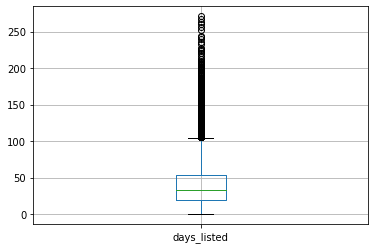

In [47]:
Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('days_listed')

In [48]:
Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR

outlier = df[df['days_listed']>u_limit]
outlier_count = outlier['days_listed'].count()
print("There are {} 'days_listed' outliers".format(outlier_count))

There are 1618 'days_listed' outliers


In [49]:
outlier = df[df['days_listed']>u_limit]
outlier_count = outlier['days_listed'].count()
print("There are {} 'days_listed' outliers".format(outlier_count))

There are 1618 'days_listed' outliers


In [50]:
def f(row):
    if (row['days_listed'] >= l_limit) and (row['days_listed'] <= u_limit):
        val = False
    else:
        val = True
    return val
df['outlier_days_listed'] = df.apply(f, axis=1)

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
As for days_listed column, it is better not to delete the outliers from this column because it contains rather sensetive information, Also, according to the instruction, you simply need to explore the data in this column:
       
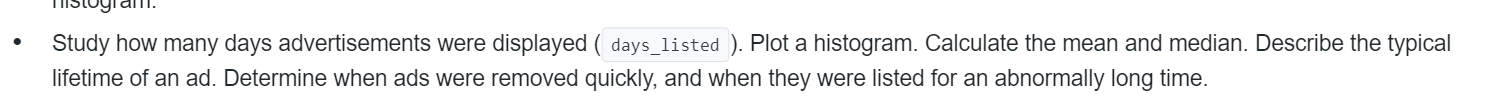
       
And now it is better to concentrate on the answering these questions👀

### Vehicle Age

<AxesSubplot:>

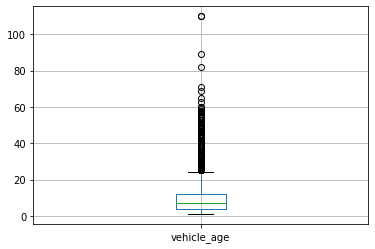

In [51]:
Q1 = df['vehicle_age'].quantile(0.25)
Q3 = df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('vehicle_age')

In [52]:
outlier = df[df['vehicle_age']>u_limit]
outlier_count = outlier['vehicle_age'].count()
print("There are {} 'vehicle_age' outliers".format(outlier_count))

There are 737 'vehicle_age' outliers


In [53]:
def f(row):
    if (row['vehicle_age'] >= l_limit) and (row['vehicle_age'] <= u_limit):
        val = False
    else:
        val = True
    return val
df['outlier_vehicle_age'] = df.apply(f, axis=1)

### Average Yearly Miles

<AxesSubplot:>

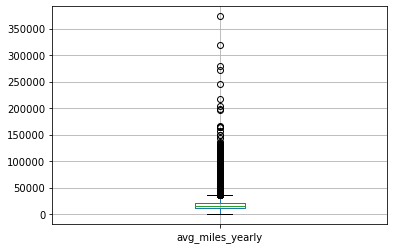

In [54]:
Q1 = df['avg_miles_yearly'].quantile(0.25)
Q3 = df['avg_miles_yearly'].quantile(0.75)
IQR = Q3 - Q1
u_limit = Q3 + 1.5*IQR
l_limit = Q3 - 1.5*IQR
df.boxplot('avg_miles_yearly')

In [55]:
outlier = df[df['avg_miles_yearly']>u_limit]
outlier_count = outlier['avg_miles_yearly'].count()
print("There are {} 'avg_miles_yearly' outliers".format(outlier_count))

There are 3176 'avg_miles_yearly' outliers


In [56]:
def f(row):
    if (row['avg_miles_yearly'] >= l_limit) and (row['avg_miles_yearly'] <= u_limit):
        val = False
    else:
        val = True
    return val
df['outlier_avg_miles_yearly'] = df.apply(f, axis=1)

In [57]:
df['outliers']=df['outlier_avg_miles_yearly']\
    +df['outlier_cylinders']*1\
    +df['outlier_days_listed']*1\
    +df['outlier_odometer']*1\
    +df['outlier_price']*1\
    +df['outlier_vehicle_age']*1

In [58]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,day_of_week,vehicle_age,avg_miles_yearly,outlier_price,outlier_cylinders,outlier_odometer,outlier_days_listed,outlier_vehicle_age,outlier_avg_miles_yearly,outliers
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,...,5,7,20714,False,False,False,False,False,False,0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,truck,white,...,4,7,12672,False,False,False,False,False,False,0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,...,3,6,18333,False,False,False,False,False,False,0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,truck,unknown,...,4,16,10087,False,False,False,False,False,False,0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,...,1,2,40451,False,False,False,False,False,True,1


In [59]:
df_outliers = df[df.outliers != 0]
df_no_outliers = df[df.outliers == 0]
print('There are',len(df_no_outliers), 'records with no outliers, and there are', len(df_outliers), 'records with outliers')

There are 34938 records with no outliers, and there are 16587 records with outliers


## Now let's compare the histograms of filtered and unfiltered data.  

### Price

<AxesSubplot:>

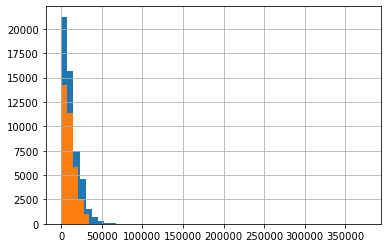

In [60]:
price = df['price']
price_no = df_no_outliers['price']
price.hist(bins=50)
price_no.hist(bins=5)

### Cylinders

<AxesSubplot:>

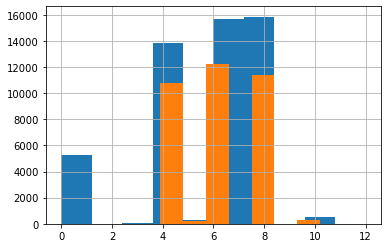

In [61]:
cylinders = df['cylinders']
cylinders_no = df_no_outliers['cylinders']
cylinders.hist()
cylinders_no.hist()

### We got rid of the zeros, but our distribution stayed the same.

### Model Years

<AxesSubplot:>

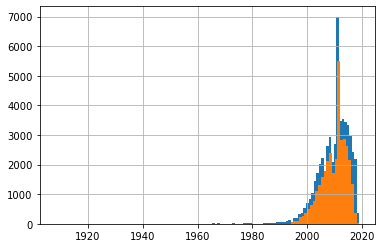

In [62]:
model_year = df['model_year']
model_year_no = df_no_outliers['model_year']
model_year.hist(bins=120)
model_year_no.hist(bins=25)

### Odometer

<AxesSubplot:>

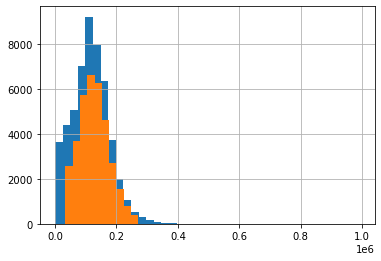

In [63]:
odometer = df['odometer']
odometer_no = df_no_outliers['odometer']
odometer.hist(bins=40)
odometer_no.hist(bins=10)

### Days Listed

<AxesSubplot:>

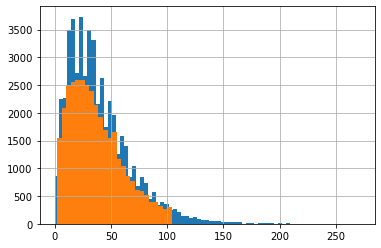

In [64]:
days_listed = df['days_listed']
days_listed_no = df_no_outliers['days_listed']
days_listed.hist(bins=75)
days_listed_no.hist(bins=25)

### Vehicle Age

<AxesSubplot:>

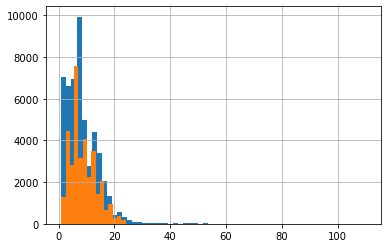

In [65]:
vehicle_age = df['vehicle_age']
vehicle_age_no = df_no_outliers['vehicle_age']
vehicle_age.hist(bins=60)
vehicle_age_no.hist(bins=15)

### Average Miles Yearly

<AxesSubplot:>

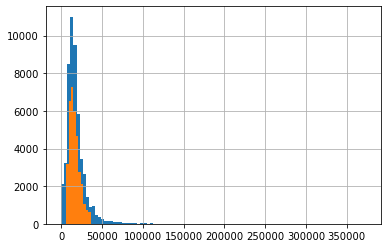

In [66]:
avg_miles_yearly = df['avg_miles_yearly']
avg_miles_yearly_no = df_no_outliers['avg_miles_yearly']
avg_miles_yearly.hist(bins=100)
avg_miles_yearly_no.hist(bins=10)

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
Ok, correct actions here, but it is important to fix the visualization.

# Here is a histogram of days listed with all the outliers removed.  

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

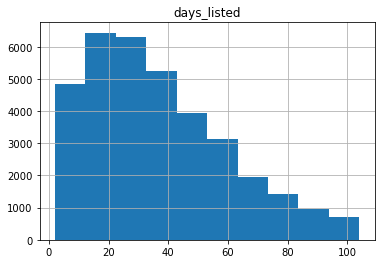

In [67]:
df_no_outliers.hist('days_listed')

In [68]:
print('mean:',df_no_outliers['days_listed'].mean(), 'median:',df_no_outliers['days_listed'].median())

mean: 36.81922262293205 median: 32.0


### All these histograms (except model_year) skew right, meaning the mean is higher than the median in all these cases.  More vehicles are listed on the site for less time than average.  


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
Ok, yes, the project is not complete yet, so, I'll waiting for new version of your project for the next iteration of the review.
        
What can I advice you here:
        
1) at the next steps of the analysis you need to identify the two most advertized types of vehicles (see the instruction) when you do this, you need to analyze two these types of vehicles separately: i.e. you can create two slice of data: for one type of vehicles and for second type, and then you create plots for categorical variables and calculate correlation for one type of vehicles (using the first slice of the data) and then for the second. That's the idea, please, follow it👌
        
2) it is bettre to analyze the condition column as categorical (despite the fact that we replace categories in this column with numbers, it is still can be considered as categorical), so it is better to analyze it as categorical, i.e. you can try to use graphical method here (barplot or boxplot), scatter plot is not very suitable here.
        
3) as for correlation (you need to conduct correclation analysis here) you can create one common correlation matrix for quantitative variables or visualize correlation analysis using heatmap plot. More information below:
        
https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c?gi=59629750b22d
        
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
        
https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
        
https://datatofish.com/correlation-matrix-pandas/
        
https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
        
</div>

In [69]:
model_agg = df_no_outliers.pivot_table(index='type', values=['price'], aggfunc=['count','mean'])#.sort_values(by='count',ascending = False)
model_agg#.sort_values(by='count',ascending=False)
#model_agg.hist()


,count,mean
,price,price
type,,
SUV,8862,9652.652336
bus,12,8404.666667
convertible,203,11710.807882
coupe,1170,10201.874359
hatchback,722,6094.840720
mini-van,864,7236.343750
offroad,138,13576.231884
other,161,9587.670807


<AxesSubplot:xlabel='type', ylabel='Price'>

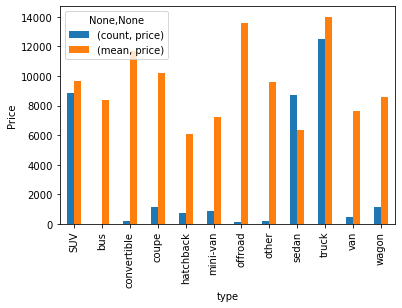

In [70]:
#model_agg.hist('type')
model_agg.plot(kind='bar', ylabel='Price')#something looks off here


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
Ok, here the code provides the error, please, try to improve this bug.
        
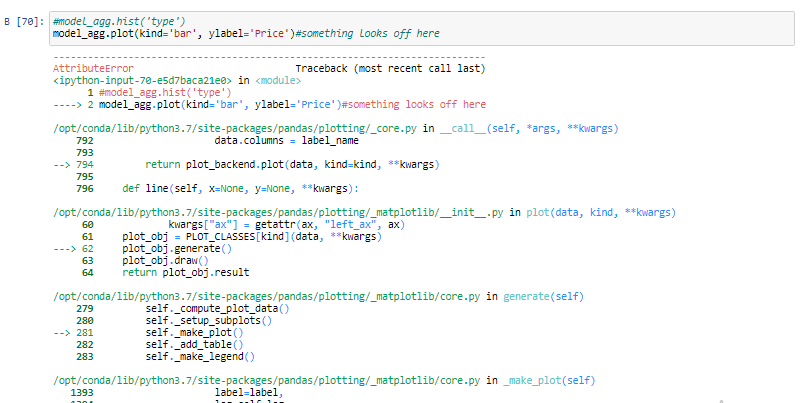
        
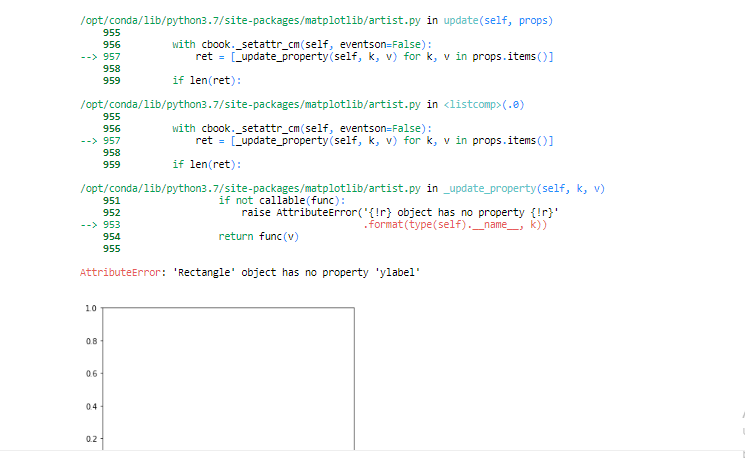

In [71]:
most_advertised = df_no_outliers.pivot_table(index='type', values='model', aggfunc='count')
most_advertised.sort_values(by='model',ascending=False).head(2)

,model
type,
truck,12519
SUV,8862


In [72]:
trucks = df_no_outliers.query('type == "truck"')
suvs   = df_no_outliers.query('type == "SUV"')
most_advertised = trucks.append(suvs, ignore_index=True)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, the two most advertised types of vehicles are identified correctly, good job!

<AxesSubplot:xlabel='vehicle_age', ylabel='price'>

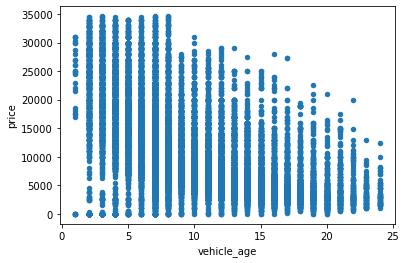

In [73]:
most_advertised.plot.scatter(x='vehicle_age',y='price')

### The older a vehicle is on average, the less it costs.

<AxesSubplot:xlabel='odometer', ylabel='price'>

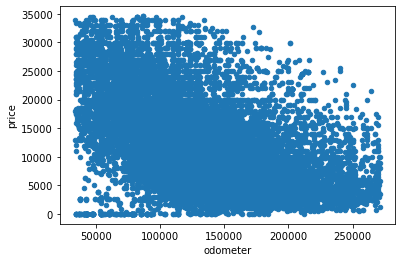

In [74]:
most_advertised.plot.scatter(x='odometer',y='price')

### The more miles, the lower the price.

<AxesSubplot:xlabel='condition', ylabel='price'>

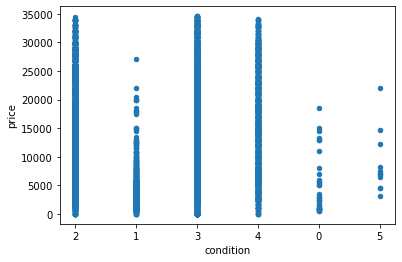

In [75]:
most_advertised.plot.scatter(x='condition',y='price')


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
technical error again!
        
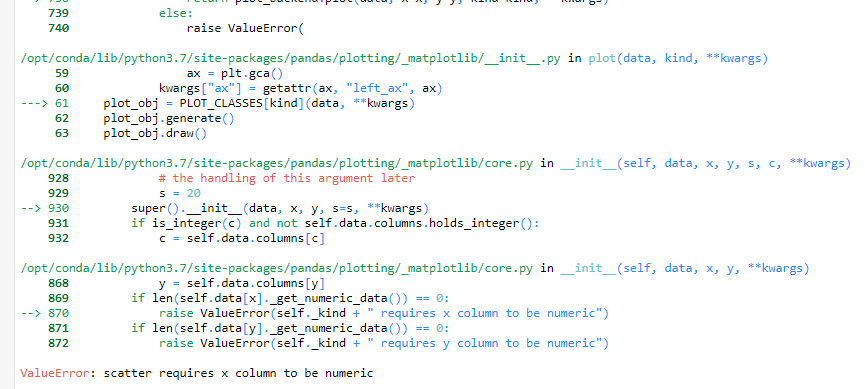
        
Before submitting the project for the review, please, restart kernel and run all the cells to check if the code cells work correctly.

### There are not enough values in 0 and 5 from which to make inferences. Otherwise, it looks like the nbetter the condition the vehicle, the higher the price

In [76]:
most_advertised.describe(include='all').transpose()

<ipython-input-76-04c86c2a2c75>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  most_advertised.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,21381.0,NaN,NaN,NaN,NaT,NaT,12203.002105,7631.812654,1.0,5995.0,10900.0,16995.0,34595.0
model_year,21381.0,NaN,NaN,NaN,NaT,NaT,2009.026472,4.691009,1994.0,2006.0,2010.0,2013.0,2018.0
model,21381,80,ford f-150,1927,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,21381,6,3,10297,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,21381.0,NaN,NaN,NaN,NaT,NaT,6.791731,1.429209,3.0,6.0,8.0,8.0,12.0
fuel,21381,5,gas,19361,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,21381.0,NaN,NaN,NaN,NaT,NaT,132117.029278,48626.182969,34096.0,97249.0,129500.0,162017.0,271000.0
transmission,21381,3,automatic,20026,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,21381,2,truck,12519,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,21381,13,white,4818,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Price by Transmission Type')

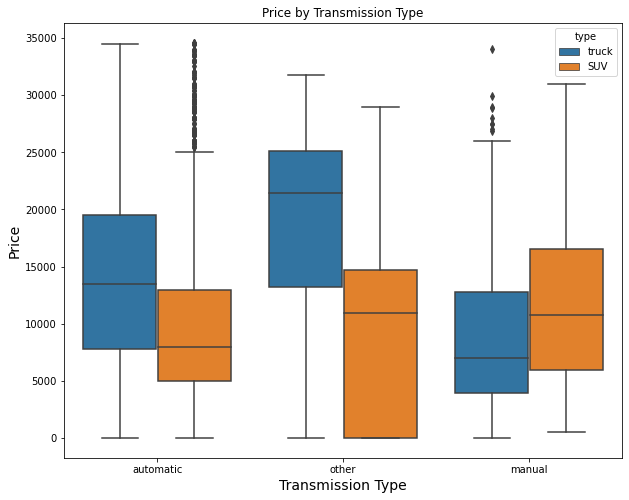

In [77]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="transmission", y="price", hue='type', data=most_advertised)
# Set labels and title
plt.ylabel("Price", size=14)
plt.xlabel("Transmission Type", size=14)
plt.title("Price by Transmission Type")

### Trucks with automatic transmissions are more expensive than trucks with a manual transmission.  For SUVs it is the opposite but less extreme.  SUVs with automatic transmissions are slightly less expensive than those with a manual transmission.  

Text(0.5, 1.0, 'Price by Vehicle Color')

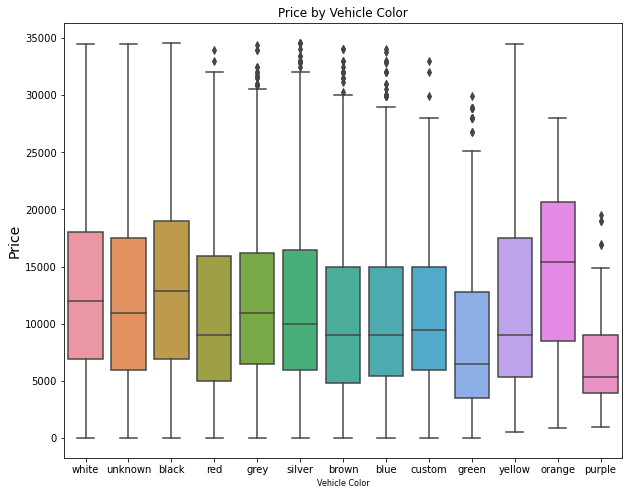

In [78]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="paint_color", y="price", data=most_advertised)
# Set labels and title
plt.ylabel("Price", size=14)
plt.xlabel("Vehicle Color", size=8)
plt.title("Price by Vehicle Color")


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
       
Reminder again: as for paint_color, you also need to analyze it for each of the most advertised types of vehicles, for example, as you did in case of transmission, I can see the kegend and pairs of boxplots, for paint_color there is no such separation.
        
And, please, again read my comment above (that is from the first iteration of the review) you need also calculate the correlation for quantitative variables and interpret the coefficients, and it is better to format the plots according to my recommendations.

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion^second iteration of the review**

Jay, thank you for submitting your project! I can see that you've worked really hard on it! You did a great job to bring the project to completion, thanks for your patience and desire to complete the project! But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!

**Good things and practices in your project I want to highlight🙂**:
* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You used visualization a lot, good job!
* You formulated conclusions after the each step of the analysis!
    
**What is worth working on👀**:

* Please, calculate the correlation for quantitative variable
* Please, try to format the plots a little bit, for EDA project it is crucially important.
* Some cells provide technical errors, it is important to fix them.
* You can find other recommendations in my comments!

 
**Good luck! I will wait for your work for a third iteration of the review!😉**
    
![gif](https://media.giphy.com/media/fwbZnTftCXVocKzfxR/giphy.gif)  

### Most colors don't impact price.  Orange skews more expensive, while purple and green skew less expensive.

# Overall conclusion

### There were a lot of missing values in the initial dataset.  Filling in the null values and eliminating outliers preserved thousands of records.  The factors that impact price the most are miles, condition and price. There are more trucks and SUVs than all other categories combined.  The average vehicle is sold in 36 days, but most vehicles are sold in less than 36 days.  

### I recommend requiring sellers to fill in certain fields before committing the record, not just for our data, but for the purchaser, such as model_year and odometer.

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn